In [40]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


## Import data related to immigration

In [41]:
df_im=pd.read_excel('2022_0920_plcy_state_immigration_data_sheets_fy2021.xlsx',sheet_name='All States per Million 2021',header=4)
df_im.head(6)

,Unnamed: 0,Unnamed: 1,Total,Rank,Adjustments,Rank.1,New Arrivals,Rank.2,Total.1,Rank.3,Total.2,Rank.4,Total.3,Rank.5,Total.4,Rank.6
0,Alabama,5039877.0,572.831440,47.0,390.287303,47.0,182.544137,48.0,9899.646360,39.0,320.245911,51.0,0,D,4.96,45
1,Alaska,732673.0,1038.662541,34.0,582.797510,41.0,455.865031,23.0,66032.186255,6.0,1214.730173,27.0,16.378384,38,D,D
2,Arizona,7276316.0,1988.093975,15.0,1443.862526,13.0,544.231449,17.0,66814.442913,5.0,2406.712408,14.0,57.996382,8,20.752,28
3,Arkansas,3025891.0,854.624307,39.0,596.848994,40.0,257.775313,38.0,9765.057631,40.0,685.417948,43.0,13.549728,40,3.966,47
4,California,39237836.0,3445.169606,4.0,2425.261169,3.0,1019.908437,3.0,47394.841041,8.0,4380.032579,3.0,25.128807,35,132.449,3
5,Colorado,5812069.0,1745.677830,18.0,1251.189551,18.0,494.488279,19.0,28745.701402,15.0,1517.359825,22.0,45.594779,17,23.228,27


In [42]:
df_im.columns=['States','Population','Lawful permanent residents - Total','Lawful permanent residents - Rank',
               'Lawful permanent residents - Adjustment','Lawful permanent residents - Adjustment Rank',
               'Lawful permanent residents - New arrivals','Lawful permanent residents - New arrivals Rank',
               'Nonimmigrants Total','Nonimmigrants Rank','Naturalizations Total','Naturalizations Rank',
               'Refugees Total','Refugees Rank','Asylees Total','Asylees Rank']
df_im.head()

,States,Population,Lawful permanent residents - Total,Lawful permanent residents - Rank,Lawful permanent residents - Adjustment,Lawful permanent residents - Adjustment Rank,Lawful permanent residents - New arrivals,Lawful permanent residents - New arrivals Rank,Nonimmigrants Total,Nonimmigrants Rank,Naturalizations Total,Naturalizations Rank,Refugees Total,Refugees Rank,Asylees Total,Asylees Rank
0,Alabama,5039877.0,572.831440,47.0,390.287303,47.0,182.544137,48.0,9899.646360,39.0,320.245911,51.0,0,D,4.96,45
1,Alaska,732673.0,1038.662541,34.0,582.797510,41.0,455.865031,23.0,66032.186255,6.0,1214.730173,27.0,16.378384,38,D,D
2,Arizona,7276316.0,1988.093975,15.0,1443.862526,13.0,544.231449,17.0,66814.442913,5.0,2406.712408,14.0,57.996382,8,20.752,28
3,Arkansas,3025891.0,854.624307,39.0,596.848994,40.0,257.775313,38.0,9765.057631,40.0,685.417948,43.0,13.549728,40,3.966,47
4,California,39237836.0,3445.169606,4.0,2425.261169,3.0,1019.908437,3.0,47394.841041,8.0,4380.032579,3.0,25.128807,35,132.449,3


## Imported data related to personal income

In [43]:
df_inc=pd.read_csv('SQINC4__ALL_AREAS_1948_2023.csv')
df_inc.head(5)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1948:Q1,1948:Q2,...,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2
0,"""00000""",United States,,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,204641.7,210069.4,...,22147826.5,21031135.9,21124208.1,21268077.5,21395331.0,21640433.8,21995492.2,22249735.0,22618087.4,22857766.7
1,"""00000""",United States,,SQINC4,11.0,...,Nonfarm personal income 1/,Millions of dollars,187286.5,189282.1,...,22066181.5,20902892.4,21004486.2,21174547.8,21292325.1,21525801.2,21883686.5,22137023.2,22517586.4,22769925.4
2,"""00000""",United States,,SQINC4,12.0,...,Farm income 2/,Millions of dollars,17355.2,20787.3,...,81645.0,128243.5,119721.9,93529.6,103005.9,114632.6,111805.7,112711.8,100501.0,87841.3
3,"""00000""",United States,,SQINC4,20.0,...,"Population (midperiod, persons) 3/",Number of persons,(NA),(NA),...,331744065.0,331901960.0,332229899.0,332536080.0,332727966.0,333070786.0,333549569.0,334032634.0,334391329.0,334769235.0
4,"""00000""",United States,,SQINC4,30.0,...,Per capita personal income (dollars) 4/,Dollars,(NA),(NA),...,66762.0,63366.0,63583.0,63957.0,64303.0,64972.0,65944.0,66609.0,67640.0,68279.0


In [44]:
df_inc1=df_inc[df_inc.Description=='Personal income (millions of dollars, seasonally adjusted) ']
df_inc1=df_inc1.reset_index()
df_inc1.head(3)

,index,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1948:Q1,...,2021:Q1,2021:Q2,2021:Q3,2021:Q4,2022:Q1,2022:Q2,2022:Q3,2022:Q4,2023:Q1,2023:Q2
0,0,"""00000""",United States,,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,204641.7,...,22147826.5,21031135.9,21124208.1,21268077.5,21395331.0,21640433.8,21995492.2,22249735.0,22618087.4,22857766.7
1,20,"""01000""",Alabama,5,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,2496.0,...,266593.2,245905.6,247487.7,251181.2,252387.8,255728.9,260858.5,264473.5,269220.9,270754.1
2,40,"""02000""",Alaska *,8,SQINC4,10.0,...,"Personal income (millions of dollars, seasonal...",Millions of dollars,(NA),...,49925.2,47397.6,47485.1,48023.9,49140.4,50110.1,50838.0,51310.2,51224.5,51779.2


## Data Analysis

In [45]:
df_im['Nonimmigrants Total'].head()

0     9899.646360
1    66032.186255
2    66814.442913
3     9765.057631
4    47394.841041
Name: Nonimmigrants Total, dtype: float64

In [46]:
df_inc1['2021:Q4'].head()

0    21268077.5
1      251181.2
2       48023.9
3      410880.1
4      154713.6
Name: 2021:Q4, dtype: float64

In [47]:
dim=pd.DataFrame({'States':df_inc1['GeoName'],'Personnal income 2020':df_inc1['2020:Q4']*1000000})
dinc=pd.DataFrame({'States':df_im['States'],'Population':df_im['Population'],'Permanent residents':df_im['Lawful permanent residents - Total'],'Nonimmigrants (% of population)':df_im['Nonimmigrants Total']/df_im['Population']})

In [48]:
dim.shape,dinc.shape

((60, 2), (56, 4))

In [49]:
dim=dim.set_index('States')
dinc=dinc.set_index('States')
dim.head(3),dinc.head(3)

(               Personnal income 2020
 States                              
 United States           1.969730e+13
 Alabama                 2.302868e+11
 Alaska *                4.496160e+10,
          Population  Permanent residents  Nonimmigrants (% of population)
 States                                                                   
 Alabama   5039877.0           572.831440                         0.001964
 Alaska     732673.0          1038.662541                         0.090125
 Arizona   7276316.0          1988.093975                         0.009182)

In [50]:

pd.merge(dim,dinc,right_index=True,left_index=True)


,Personnal income 2020,Population,Permanent residents,Nonimmigrants (% of population)
States,,,,
Alabama,2.302868e+11,5039877.0,572.831440,0.001964
Arizona,3.759074e+11,7276316.0,1988.093975,0.009182
Arkansas,1.415688e+11,3025891.0,854.624307,0.003227
California,2.813864e+12,39237836.0,3445.169606,0.001208
Colorado,3.789906e+11,5812069.0,1745.677830,0.004946
Connecticut,2.795515e+11,3605597.0,2397.938538,0.005492
Delaware,5.474320e+10,1003384.0,1823.828165,0.013367
District of Columbia,6.036360e+10,670050.0,2857.995672,0.183272
Florida,1.232437e+12,21781128.0,3821.060140,0.006656


Some states do not appear in the previous result of data frame merge, because in data frame 'dim' and asterisk is added to their names, such as Alaska

In [51]:
dim.head()

,Personnal income 2020
States,
United States,1.969730e+13
Alabama,2.302868e+11
Alaska *,4.496160e+10
Arizona,3.759074e+11
Arkansas,1.415688e+11


In [52]:
y=list()
for i in dim.index:
    if '*' in i:
        y.append(i[:-2])
    else:
        y.append(i)
    
dim.index=y

Merge data frames and compare data to verify if they are correct

In [53]:
df=pd.merge(dim,dinc,right_index=True,left_index=True)
df.tail(),dinc.tail(10),dim.tail(10)

(               Personnal income 2020  Population  Permanent residents  \
 Virginia                5.352031e+11   8642274.0          2363.729731   
 Washington              5.262269e+11   7738692.0          2861.594698   
 West Virginia           7.900590e+10   1782959.0           277.067504   
 Wisconsin               3.310828e+11   5895908.0           852.286026   
 Wyoming                 3.790980e+10    578803.0           483.756995   
 
                Nonimmigrants (% of population)  
 Virginia                              0.002048  
 Washington                            0.004059  
 West Virginia                         0.002581  
 Wisconsin                             0.001436  
 Wyoming                               0.017393  ,
                                                     Population  \
 States                                                           
 Vermont                                               645570.0   
 Virginia                                           

In [56]:
# Calculate personnal income per capita
df['Personnal income per capita']=df['Personnal income 2020']/df['Population']

### Make the plot

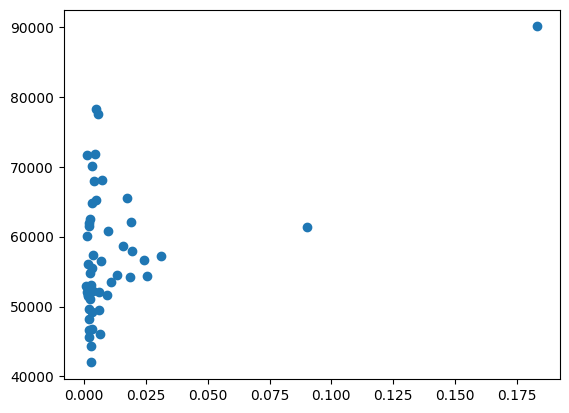

In [57]:
fig=plt.subplot()

# plt.scatter(df['Nonimmigrants (% of population)'],df['Personnal incomme'])
plt.scatter(df['Nonimmigrants (% of population)'],df['Personnal income per capita'])

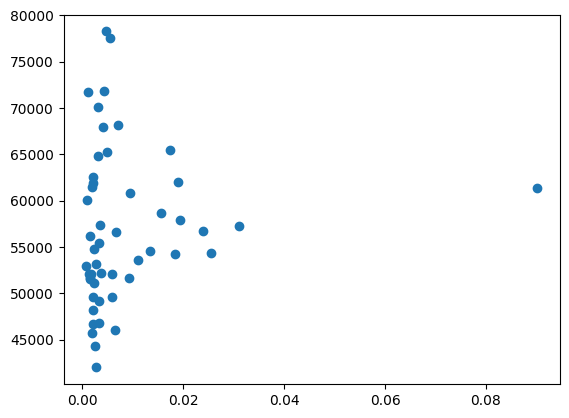

In [58]:
fig=plt.subplot()

# plt.scatter(df['Nonimmigrants (% of population)'],df['Personnal incomme'])
plt.scatter([i for i in df['Nonimmigrants (% of population)'] if i!=max(df['Nonimmigrants (% of population)'])],[i for i in df['Personnal income per capita'] if i!=max(df['Personnal income per capita'] )])

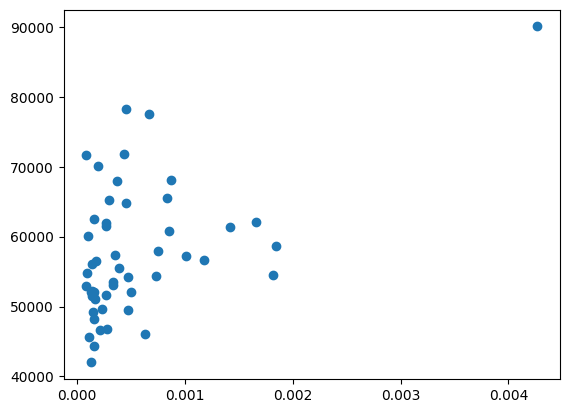

In [59]:
fig=plt.subplot()

# plt.scatter(df['Nonimmigrants (% of population)'],df['Personnal incomme'])
plt.scatter(df['Permanent residents']/df['Population'],df['Personnal income per capita'])

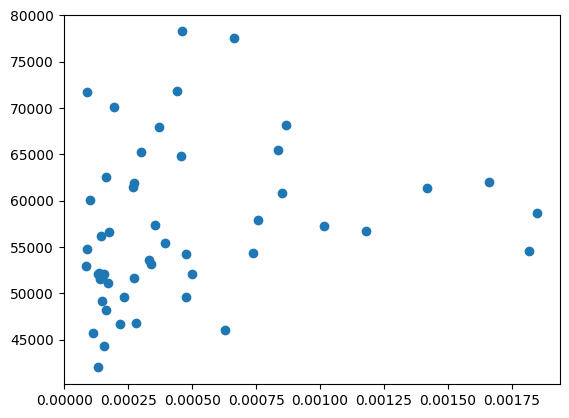

In [60]:
fig=plt.subplot()
plt.scatter([i for i in df['Permanent residents']/df['Population'] if i!=max(df['Permanent residents']/df['Population'])],[i for i in df['Personnal income per capita'] if i!=max(df['Personnal income per capita'] )])

In [61]:
np.corrcoef([i for i in df['Permanent residents']/df['Population'] if i!=max(df['Permanent residents']/df['Population'])],[i for i in df['Personnal income per capita'] if i!=max(df['Personnal income per capita'] )])

array([[1.        , 0.22600289],
       [0.22600289, 1.        ]])

In [62]:
# Use data 2020 instead

In [63]:
df_pop=pd.read_excel('NST-EST2022-POP.xlsx',header=3,nrows=57) # Source: https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html
df_pop.columns=['States','Estimates base','Population 2020','Population 2021','Population 2022']
df_pop=df_pop.set_index('States')
df_pop

,Estimates base,Population 2020,Population 2021,Population 2022
States,,,,
United States,331449520,331511512,332031554,333287557
Northeast,57609156,57448898,57259257,57040406
Midwest,68985537,68961043,68836505,68787595
South,126266262,126450613,127346029,128716192
West,78588565,78650958,78589763,78743364
.Alabama,5024356,5031362,5049846,5074296
.Alaska,733378,732923,734182,733583
.Arizona,7151507,7179943,7264877,7359197
.Arkansas,3011555,3014195,3028122,3045637


There is a dot before States names. I should remove them

In [64]:
z=list()
for i in df_pop.index:
    if '.' in i:
        z.append(i[1:])
    else:
        z.append(i)
    
df_pop.index=z



In [65]:
# to name index as States in df
df['States']=df.index
df=df.set_index('States')
df.head()


,Personnal income 2020,Population,Permanent residents,Nonimmigrants (% of population),Personnal income per capita
States,,,,,
Alabama,2.302868e+11,5039877.0,572.831440,0.001964,45692.940522
Alaska,4.496160e+10,732673.0,1038.662541,0.090125,61366.530499
Arizona,3.759074e+11,7276316.0,1988.093975,0.009182,51661.774997
Arkansas,1.415688e+11,3025891.0,854.624307,0.003227,46785.822754
California,2.813864e+12,39237836.0,3445.169606,0.001208,71713.016997


In [66]:
# df_pop=df_pop.set_index('States')
df_pop.head(2)


,Estimates base,Population 2020,Population 2021,Population 2022
United States,331449520,331511512,332031554,333287557
Northeast,57609156,57448898,57259257,57040406


In [67]:
df.head(2),df_pop.head(2)

(         Personnal income 2020  Population  Permanent residents  \
 States                                                            
 Alabama           2.302868e+11   5039877.0           572.831440   
 Alaska            4.496160e+10    732673.0          1038.662541   
 
          Nonimmigrants (% of population)  Personnal income per capita  
 States                                                                 
 Alabama                         0.001964                 45692.940522  
 Alaska                          0.090125                 61366.530499  ,
                Estimates base  Population 2020  Population 2021  \
 United States       331449520        331511512        332031554   
 Northeast            57609156         57448898         57259257   
 
                Population 2022  
 United States        333287557  
 Northeast             57040406  )

In [68]:
# df1=pd.merge(df,df_pop,left_index=True,right_index=True)
# df1.head()

# Enrollment

In [69]:
df_edu=pd.read_excel('tabn304.10.xls',header=1,nrows=50)
df_edu['States']=df_edu['State or jurisdiction']
# df_edu.index=df_edu['States']
df_edu=df_edu.set_index('States')
df_edu=df_edu.iloc[1:,1:-1]
df_edu.head()

,1970,1980,1990,2000,2010,2015,2017,2018,2019,2020
States,,,,,,,,,,
United States,8580887,12096895,13818637,15312289,21019438,19988204,19778151,19651412,19630178,18991798
Alabama,103936,164306,218589,233962,327606,302959,306817,304182,303023,292181
Alaska,9471,21296,29833,27953,34799,31373,26905,25692,23353,22106
Arizona,109619,202716,264148,342490,793871,650422,591122,581985,609144,600103
Arkansas,52039,77347,90425,115172,175848,168402,163963,160644,158567,149294


In [70]:
pd.merge(pd.merge(df,df_pop,left_index=True,right_index=True),df_edu,left_index=True,right_index=True)

,Personnal income 2020,Population,Permanent residents,Nonimmigrants (% of population),Personnal income per capita,Estimates base,Population 2020,Population 2021,Population 2022,1970,1980,1990,2000,2010,2015,2017,2018,2019,2020


In [71]:

df.index[0:5],df_edu.index[0:5]

(Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California'], dtype='object', name='States'),
 Index(['   United States ', 'Alabama ', 'Alaska ', 'Arizona ', 'Arkansas '], dtype='object', name='States'))

There is a space to remove in States in df_edu

In [72]:
u=list()
for i in df_edu.index:
    if ' ' in i:
        u.append(i.rstrip())
    else:
        u.append(i)
    
df_edu.index=u

df_edu.index[0:5]

Index(['   United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas'], dtype='object')

In [73]:
df_edu['Higher education enrollment in 2020']=df_edu[2020]

In [74]:
df2=pd.merge(pd.merge(df,df_pop,left_index=True,right_index=True),df_edu,left_index=True,right_index=True)
df2.head()

,Personnal income 2020,Population,Permanent residents,Nonimmigrants (% of population),Personnal income per capita,Estimates base,Population 2020,Population 2021,Population 2022,1970,1980,1990,2000,2010,2015,2017,2018,2019,2020,Higher education enrollment in 2020
Alabama,2.302868e+11,5039877.0,572.831440,0.001964,45692.940522,5024356,5031362,5049846,5074296,103936,164306,218589,233962,327606,302959,306817,304182,303023,292181,292181
Alaska,4.496160e+10,732673.0,1038.662541,0.090125,61366.530499,733378,732923,734182,733583,9471,21296,29833,27953,34799,31373,26905,25692,23353,22106,22106
Arizona,3.759074e+11,7276316.0,1988.093975,0.009182,51661.774997,7151507,7179943,7264877,7359197,109619,202716,264148,342490,793871,650422,591122,581985,609144,600103,600103
Arkansas,1.415688e+11,3025891.0,854.624307,0.003227,46785.822754,3011555,3014195,3028122,3045637,52039,77347,90425,115172,175848,168402,163963,160644,158567,149294,149294
California,2.813864e+12,39237836.0,3445.169606,0.001208,71713.016997,39538245,39501653,39142991,39029342,1257245,1791088,1808740,2256708,2714699,2687410,2724446,2723547,2714753,2579991,2579991


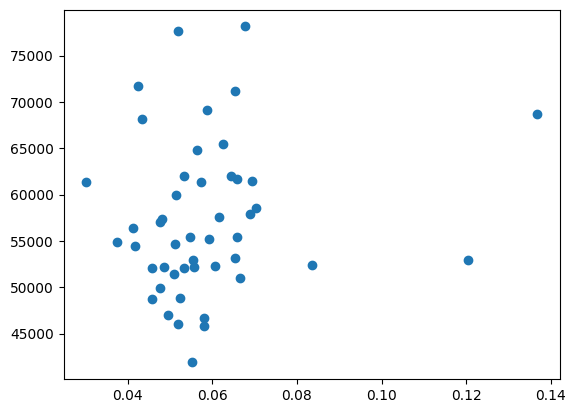

In [75]:
df2['Higher education enrollment in 2020 (% population 2020)']=df2['Higher education enrollment in 2020']/df2['Population 2020']
df2['Personnal income 2020 (% population 2020)']=df2['Personnal income 2020']/df2['Population 2020']

fig=plt.subplot()
plt.scatter([i for i in df2['Higher education enrollment in 2020 (% population 2020)'] if i!=max(df2['Higher education enrollment in 2020 (% population 2020)'])],
[i for i in df2['Personnal income 2020 (% population 2020)'] if i!=max(df2['Personnal income 2020 (% population 2020)'])])

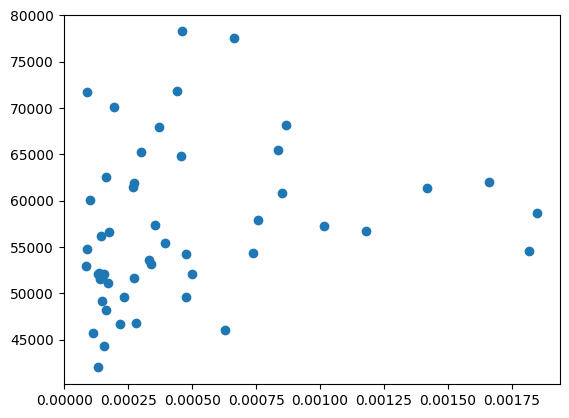

In [76]:
fig=plt.subplot()
plt.scatter([i for i in df['Permanent residents']/df['Population'] if i!=max(df['Permanent residents']/df['Population'])],[i for i in df['Personnal income per capita'] if i!=max(df['Personnal income per capita'] )])

Remove outliers in Higher education enrollment in 2020 (% population 2020)

In [77]:
# Removing outliers
sorted_data = sorted(df2['Higher education enrollment in 2020 (% population 2020)'] )
Q1 = np.percentile(sorted_data, 25)
Q3 = np.percentile(sorted_data, 75)
d = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * d
upper_bound = Q3 + 1.5 * d
lower_bound,upper_bound


(0.02537650663110347, 0.08921274876242566)

In [78]:
df3=df2[(lower_bound <= df2['Higher education enrollment in 2020 (% population 2020)']) & (df2['Higher education enrollment in 2020 (% population 2020)']<= upper_bound)]

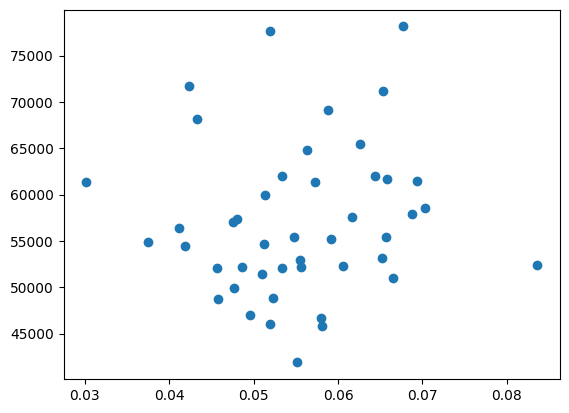

In [79]:
fig=plt.subplot()
plt.scatter(df3['Higher education enrollment in 2020 (% population 2020)'] ,df3['Personnal income 2020 (% population 2020)'] )

In [80]:
np.corrcoef(df3['Higher education enrollment in 2020 (% population 2020)'] ,df3['Personnal income 2020 (% population 2020)'] )

array([[1.        , 0.08360687],
       [0.08360687, 1.        ]])

In [81]:
# df3['Higher education enrollment in 2020 (% population 2020)'].sort_values(ascending=False)[0:20], df3['Personnal income 2020 (% population 2020)'].sort_values(ascending=False)[:20]

# USA Geographic Region

In [84]:
df_geo=pd.read_excel('state-geocodes-v2014_modifyCRL.xlsx',sheet_name='Modify_Raulin')
df_geo=df_geo.set_index('States')
df4=pd.merge(df3,df_geo,left_index=True,right_index=True)
df4.head()

,Personnal income 2020,Population,Permanent residents,Nonimmigrants (% of population),Personnal income per capita,Estimates base,Population 2020,Population 2021,Population 2022,1970,...,2015,2017,2018,2019,2020,Higher education enrollment in 2020,Higher education enrollment in 2020 (% population 2020),Personnal income 2020 (% population 2020),Region,Division
Alabama,2.302868e+11,5039877.0,572.831440,0.001964,45692.940522,5024356,5031362,5049846,5074296,103936,...,302959,306817,304182,303023,292181,292181,0.058072,45770.270555,South Region,East South Central Division
Alaska,4.496160e+10,732673.0,1038.662541,0.090125,61366.530499,733378,732923,734182,733583,9471,...,31373,26905,25692,23353,22106,22106,0.030161,61345.598378,West Region,Pacific Division
Arizona,3.759074e+11,7276316.0,1988.093975,0.009182,51661.774997,7151507,7179943,7264877,7359197,109619,...,650422,591122,581985,609144,600103,600103,0.083580,52355.206720,West Region,Mountain Division
Arkansas,1.415688e+11,3025891.0,854.624307,0.003227,46785.822754,3011555,3014195,3028122,3045637,52039,...,168402,163963,160644,158567,149294,149294,0.049530,46967.366080,South Region,West South Central Division
California,2.813864e+12,39237836.0,3445.169606,0.001208,71713.016997,39538245,39501653,39142991,39029342,1257245,...,2687410,2724446,2723547,2714753,2579991,2579991,0.065313,71234.072154,West Region,Pacific Division


['Midwest Region', 'West Region', 'Northeast Region', 'South Region']

In [86]:
region_colors = {
    'Northeast Region': 'b',  # Blue
    'Southeast Region': 'g',  # Green
    'Midwest Region': 'r',    # Red
    'South Region': 'c',      # Cyan
    'West Region': 'm',       # Magenta
}

regions=list(set(df4.Region))  # list of regions
colors = [region_colors[region] for region in regions]

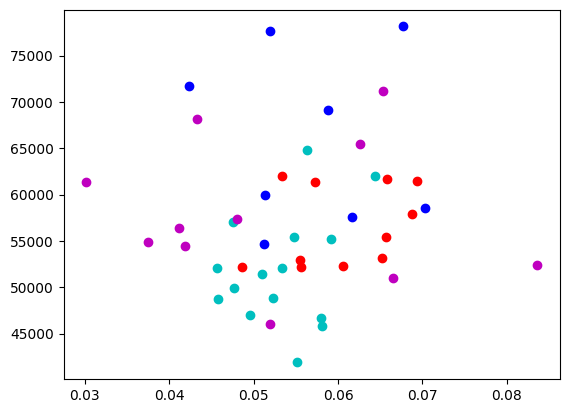

In [107]:
fig=plt.subplot()
for i in range(df4.shape[0]):
    plt.scatter(df4['Higher education enrollment in 2020 (% population 2020)'][i] ,df4['Personnal income 2020 (% population 2020)'][i]
    ,color=region_colors[df4.Region[i]])
# plt.legend(loc='upper left')

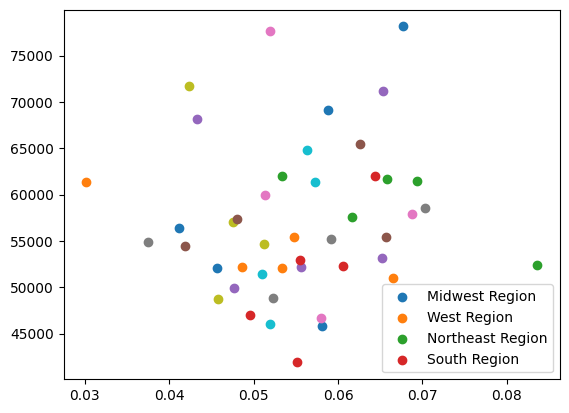

In [111]:
fig=plt.subplot()

for i in range(df4.shape[0]):
    plt.scatter(df4['Higher education enrollment in 2020 (% population 2020)'][i] ,df4['Personnal income 2020 (% population 2020)'][i])
    #color=region_colors[df4.Region[i]])

# Add the legend
plt.legend(regions)

In [118]:
region_income = df4.groupby('Region')['Personal income 2020 (% population 2020)'].mean()


KeyError: 'Column not found: Personal income 2020 (% population 2020)'